---
# **Polynomial Regression**
---

### **Introduction**
This notebook provides a comprehensive guide to understanding and implementing Polynomial regression. We'll cover the underlying concepts, step-by-step code, and practical examples to help you master this powerful statistical technique.

### **Objectives**
By the end of this notebook, you will be able to:
* Understand the concept of polynomial regression.
* Implement polynomial regression using Python and scikit-learn.
* Interpret the results of a polynomial regression model.
* Evaluate the performance of a polynomial regression model.
* Apply polynomial regression to real-world problems.

## **Conceptual Overview**

Like simple and multiple regression, Polynomial regression is a **supervised** and **regression** algorithm. Let's break down what that means:

* **Supervised:** This means we use labeled data to train the model. In other words, we have input features and corresponding output values.
* **Regression:** This means we are trying to predict a numerical value, as opposed to a class or category.

However, polynomial regression differs from simple linear regression in that it allows us to fit curved lines/planes to our data. This is accomplished by "exponentiating" our variables by taking them to powers greater than 1.

The polynomial regression equation is:

$$y = b_0 + b_1x + b_2x^2 + b_3x^3 + ... + b_nx^n$$

where:
* **y** is the dependent variable (the value we want to predict)
* **x** is the independent variable
* **b₀** is the y-intercept
* **b₁, b₂, ..., bₙ** are the coefficients
* **n** is the degree of the polynomial

This makes polynomial regression a fantastic modeling tool for exponential datasets. In practice, we just need to select the "degree" of the polynomial, and our statistical software handles the rest.

> #### **Check for Understanding:**
> * What is the difference between linear and polynomial regression?
> * How does increasing the polynomial degree affect the model?
> * What are the risks of using a very high polynomial degree?

---
# **Setup**
---
In this section, we will implement simple linear regression using Python. We will use the following libraries:

*   **NumPy:** For numerical computations.
*   **Pandas:** For data manipulation and analysis.
*   **Matplotlib and seaborn:** For data visualization.
*   **Scikit-learn:** For building and evaluating the linear regression model.

> Let's start by importing these libraries.

In [15]:
import numpy as np              # For numerical computations
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns           # For enhanced data visualization

from sklearn.model_selection import train_test_split        # For splitting the data into training and testing sets
from sklearn.preprocessing import PolynomialFeatures        # For polynomial feature transformation
from sklearn.linear_model import LinearRegression           # For building the linear regression model
from sklearn.metrics import r2_score                        # For evaluating the model

---
# **Reading and Preparing the Data for Modeling**
---

## 1. Load Dataset to workspace
We will use the `Position_Salaries.csv` dataset, which contains information about position levels and corresponding salaries. Let's load the data and take a look at it.

In [16]:
dataset = pd.read_csv('Position_Salaries.csv')

print(dataset.head())
print(dataset.shape)

   Level  Salary
0      1   45000
1      2   50000
2      3   60000
3      4   80000
4      5  110000
(10, 2)


In [17]:
print(dataset.describe())

          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


## 2. Separating the independent and dependent variables
To keep this conceptually simple and avoid abstraction, we are using a very small dataset here.  
* **X (Independent Variable):** Position Level
* **y (Dependent Variable):** Salary

In [18]:
X = dataset.iloc[:, :-1].values   # Independent variable (Position Level)
y = dataset.iloc[:, -1].values    # Dependent variable (Salary)

## 3. Creating polynomial features

Now we'll transform our features into polynomial features. We'll use a polynomial of degree 4, which has shown good results for this dataset.

In [19]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [20]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

---
# **Modeling**
---

## 1. Building and training a linear regression model

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: -195333.33333333337
Coefficients: [80878.78787879]


## 2. Building and training a polynomial regression model

In [22]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)

Intercept: -121333.33333330264
Coefficients: [     0.         180664.33566432 -48548.95104895   4120.04662005]


---
# **Evaluation (Check Performance)**
---

## Evaluating the Linear Model
With the linear model, we can now use it for generating predictions. We will use our test set so we can see how well it did.

In [23]:
linear_y_preds = lin_reg.predict(X)
linear_y_preds

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

## Evaluating the Polynomial Model
With the polynomial model, we can now use it for generating predictions. We will use our test set so we can see how well it did.

In [24]:
X_poly = poly.transform(X)
poly_y_preds = poly_reg.predict(X_poly)
poly_y_preds

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622378,
        83270.3962704 , 104820.51282052, 177594.40559441, 326312.35431236,
       575694.63869463, 950461.53846152])

## Visualizing Linear vs Polynomial Regression

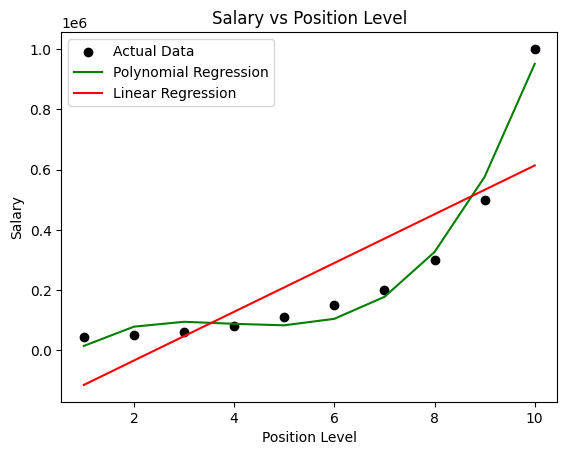

In [25]:
# Visualizing the Results of Linear Regression vs Polynomial Regression
plt.scatter(X, y, color='k', label='Actual Data')

plt.plot(X, poly_y_preds, color='green', label='Polynomial Regression')
plt.plot(X, linear_y_preds, color='red', label='Linear Regression')

plt.title('Salary vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

---
# **Inference**
---

Let's predict the salary for a position level of 7.5 (between Partner and Senior Partner)

In [26]:
sample = [[7.5]]
poly_sample = poly.fit_transform(sample)

salary = int(poly_reg.predict(poly_sample)[0])
print(f"Estimated Salary for position level 7.5: ${salary:,}")

Estimated Salary for position level 7.5: $240,915


> ### **Check for Understanding:**
> * How well does the polynomial model fit our data compared to a linear model?
> * What happend if the degree becomes higher (e.g., 20)?
> * What happend if the degree becomes lower (e.g., 2)?
> * What are the trade-offs of using a higher degree polynomial?
> * How can we prevent overfitting in polynomial regression?